In [1]:
!pip install mlxtend


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
data=pd.read_excel(r"C:\Users\atanu\OneDrive\Desktop\data science assignment\Association Rules\Online retail.xlsx",header=None)

In [4]:
data

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [5]:
transaction=data.iloc[:,0].dropna().apply(lambda x:x.split(','))

In [34]:
tr_list=TransactionEncoder()
fit=tr_list.fit(transaction).transform(transaction)
df_encoded=pd.DataFrame(fit,columns=tr_list.columns_,dtype=int)

In [35]:
# df=data[0].str.split(',',expand=True)

In [36]:
df_encoded

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
frequent_item=apriori(df_encoded,min_support=0.02,use_colnames=True)

C:\Users\atanu\.ipython\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [47]:
frequent_item

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
...,...,...
98,0.020131,"(whole wheat rice, mineral water)"
99,0.022930,"(olive oil, spaghetti)"
100,0.025197,"(pancakes, spaghetti)"
101,0.021197,"(shrimp, spaghetti)"


In [48]:
rules=association_rules(frequent_item,metric='lift',min_threshold=1)

In [49]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
1,(eggs),(burgers),0.179709,0.087188,0.028796,0.160237,1.837830,1.0,0.013128,1.086988,0.555754,0.120941,0.080026,0.245256
2,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,1.0,0.007096,1.108844,0.353384,0.093168,0.098160,0.190499
3,(french fries),(burgers),0.170911,0.087188,0.021997,0.128705,1.476173,1.0,0.007096,1.047650,0.389069,0.093168,0.045482,0.190499
4,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,1.0,0.003614,1.057552,0.162275,0.081009,0.054420,0.191083
5,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,1.0,0.003614,1.016889,0.194486,0.081009,0.016609,0.191083
6,(burgers),(spaghetti),0.087188,0.174110,0.021464,0.246177,1.413918,1.0,0.006283,1.095602,0.320707,0.089494,0.087260,0.184727
7,(spaghetti),(burgers),0.174110,0.087188,0.021464,0.123277,1.413918,1.0,0.006283,1.041163,0.354460,0.089494,0.039536,0.184727
8,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,1.0,0.008142,1.151921,0.322617,0.094064,0.131885,0.227014
9,(mineral water),(cake),0.238368,0.081056,0.027463,0.115213,1.421397,1.0,0.008142,1.038604,0.389252,0.094064,0.037169,0.227014


In [50]:
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
65,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,1.0,0.022088,1.163716,0.682343,0.168096,0.140684,0.312015
64,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
86,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939
87,(spaghetti),(olive oil),0.174110,0.065858,0.022930,0.131700,1.999758,1.0,0.011464,1.075829,0.605334,0.105651,0.070484,0.239939
79,(mineral water),(soup),0.238368,0.050527,0.023064,0.096756,1.914955,1.0,0.011020,1.051182,0.627330,0.086760,0.048690,0.276610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,(green tea),(chocolate),0.132116,0.163845,0.023464,0.177598,1.083943,1.0,0.001817,1.016724,0.089231,0.086106,0.016449,0.160402
35,(eggs),(green tea),0.179709,0.132116,0.025463,0.141691,1.072479,1.0,0.001721,1.011156,0.082387,0.088920,0.011033,0.167213
34,(green tea),(eggs),0.132116,0.179709,0.025463,0.192735,1.072479,1.0,0.001721,1.016135,0.077869,0.088920,0.015879,0.167213
46,(french fries),(milk),0.170911,0.129583,0.023730,0.138846,1.071482,1.0,0.001583,1.010756,0.080466,0.085742,0.010642,0.160987


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

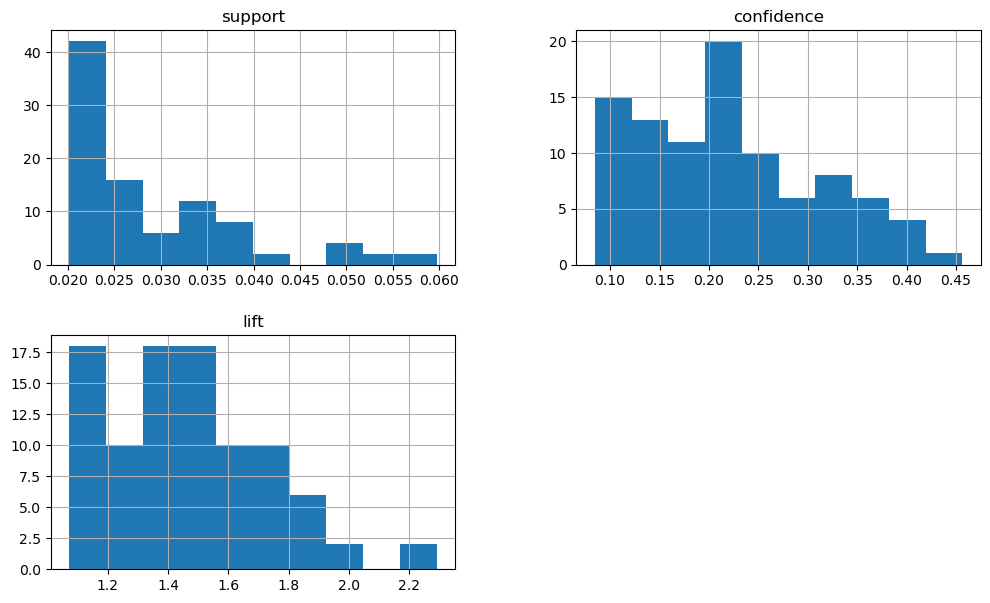

In [51]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(12,7))

In [ ]:
# most 3 frequent rules are

# spegatti and ground beef
#olive oil and spegatti
# minarel water and soup